In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data comes from [Kaggle](https://www.kaggle.com/datasets/hwwang98/software-usage-promotion-campaign-uplift-model)

In the end, want to know how effective the two treatments (tech support and discount) are at increasing revenue. Also want to develop a strategy that maximizes revenue increase. 

From data card, columns are
1) Global Flag: Whether customer has global offices
2) Major Flag: Whether customer is a large customer in their industry (as opposed to small medium corporation)
3) SMC Flag: Whether customer is small medium corporation
4) Commercial Flag: Whether the customer's business is commercial as opposed to public sector
5) IT Spend: (\$) spent on IT-related purchases
6) Employee Count: Number of employees
7) PC Count: number of PCs used by the customer
8) Size: Customer's size given their yearly revenue
9) Tech Support: (treatment; binary) whether customer received tech support
10) Discount: (treatment; binary) whether customer was given a discount
11) Revenue: (outcome; \$) revenue from customer

Want to know how many subclassifications there are \
2 Treatments -> 4 combinations of tech support (Y/N) and discount (Y/N) \
    Roughly 500 customers for each combination of tech support and discount
    
Covariates Global Flag, Major Flag, SMC Flag, and Commercial Flag strong candidates for sub-classification. Need to know whether they are exclusive. \
    Major Flag and SMC Flag are exclusive. No customer is both a major consumer in their industry and a small medium corporation. \
    1009 customers are SMC, 390 are Major, 601 are neither.
    
In descending order of occurence:
- 553 Commercial, SMC, not Global
- 326 Commercial, neither Major or SMC, not Global
- 253 SMC, not commercial, not Global
- 226 Major, Commercial, not Global
- 152 not Commercial, not Global, neither Major or SMC
- 135 Commercial, Global, SMC
- 86 not Commercial, not Global, Major
- 85 Commercial, Global, neither Major or SMC
- 68 not Commercial, Global, SMC
- 57 Commercial, Global, Major
- 38 not Commercial, Global, neither Major or SMC
- 21 not Commercial, Global, SMC

404 Global, 1596 not Global \
618 Commercial, 1386 not Commercial (public)

In [8]:
np.arange(0, 13, 4)

array([ 0,  4,  8, 12])

In [11]:
np.array([np.arange(0,4,1), np.arange(4,8,1)]).T

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [66]:
def gen_1d_distribution(data, binwidth):
    my_min, my_max = min(data), max(data)
    bins = np.arange(my_min, my_max, binwidth) + binwidth/2
    counts = np.zeros(len(bins))
    
    for x in data:
        bin_ind = (x-my_min)//binwidth
        counts[bin_ind] += 1
    # counts += 1e-15
    counts /= len(data)
    
    # removing zero counts
    inds = [ind for ind,val in enumerate(counts) if val != 0]
    
    return np.array([bins[inds], counts[inds]]).T

In [33]:
from sklearn.linear_model import LinearRegression
from scipy import stats

R-squared: 0.97


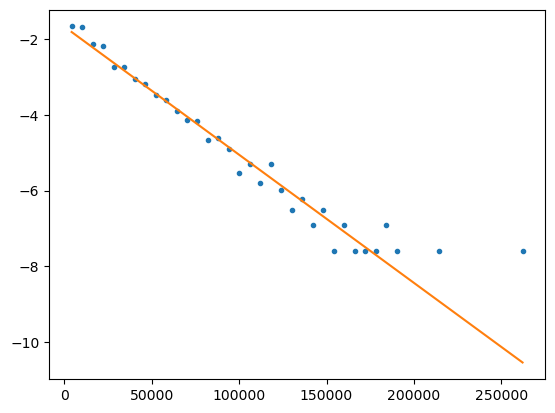

In [76]:
col, binwidth = 'IT Spend', 6000
distr = gen_1d_distribution(df[col], binwidth)
lin_fit = stats.linregress(distr[:-2,0], np.log(distr[:-2,1]))
plt.plot(distr[:,0], np.log(distr[:,1]), '.')
plt.plot(distr[:,0], lin_fit.intercept + lin_fit.slope*distr[:,0])
print('R-squared: {:.2f}'.format(lin_fit.rvalue**2))

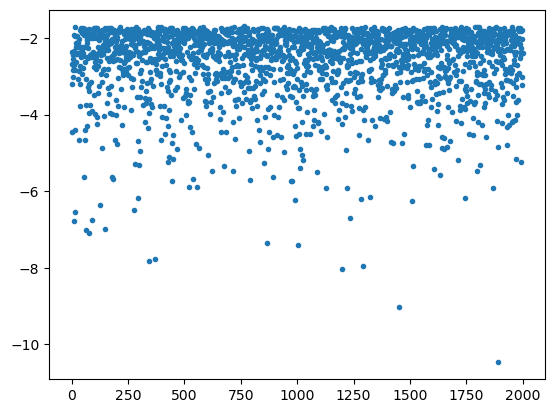

In [78]:
plt.plot(lin_fit.intercept + lin_fit.slope*df['IT Spend'], '.')

In [2]:
df = pd.read_csv('../data/raw/multi_attribution_sample.csv')

In [3]:
df[['Tech Support', 'Discount']].value_counts()

Tech Support  Discount
1             1           544
0             0           517
              1           477
1             0           462
dtype: int64

C:\Users\kimvo\AppData\Local\Temp\ipykernel_23636\3668755119.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


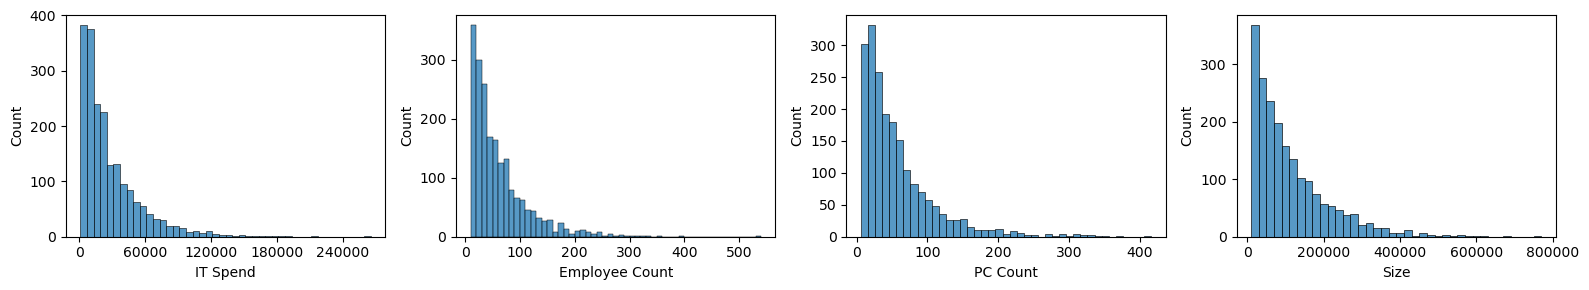

In [5]:
plt.subplots(figsize=(16,3))
plt.subplot(1,4,1)
sns.histplot(data=df, x='IT Spend', binwidth=6000)
plt.xticks([0, 60000, 120000, 180000, 240000])
plt.subplot(1,4,2)
sns.histplot(data=df, x='Employee Count', binwidth=10)
plt.subplot(1,4,3)
sns.histplot(data=df, x='PC Count', binwidth=10)
plt.subplot(1,4,4)
sns.histplot(data=df, x='Size', binwidth=20000)
plt.tight_layout()

C:\Users\kimvo\AppData\Local\Temp\ipykernel_6060\1251417535.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: xlabel='Revenue', ylabel='Count'>

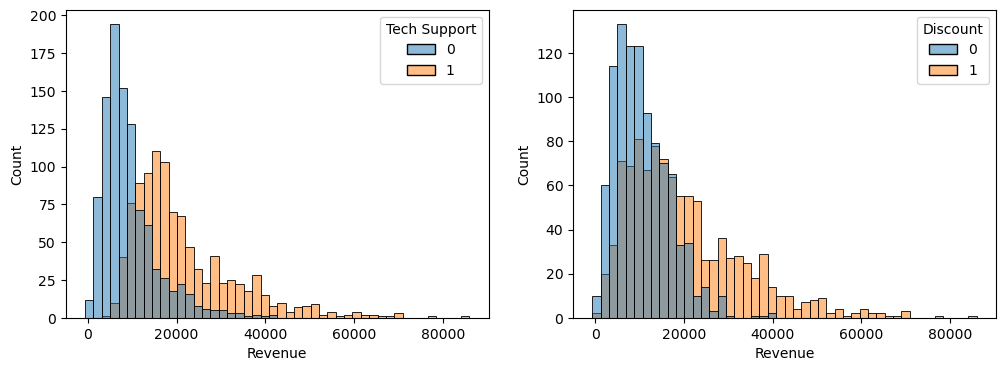

In [4]:
plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Revenue', hue='Tech Support')
plt.subplot(1,2,2)
sns.histplot(data=df, x='Revenue', hue='Discount')

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans()

In [7]:
kmeans.fit_transform(df)

array([[130884.51780054, 265659.74936946,  20791.61323824, ...,
         38175.5706022 , 159572.22380488, 436426.28071521],
       [132430.46774757, 265847.13506006,  27104.92611084, ...,
         42112.63613724, 160408.02079669, 436012.74023416],
       [250299.71378576, 147209.64632714, 100699.70032535, ...,
        157412.48913449,  42625.48844322, 317804.17503729],
       ...,
       [ 16837.76621292, 412500.4586066 , 166597.29147422, ...,
        109523.91167028, 306412.98470697, 583199.48640492],
       [ 16345.7481148 , 382369.48535562, 136839.47116916, ...,
         79993.99789763, 276329.19920473, 553055.40751572],
       [126203.11484714, 272142.78784866,  31491.9807518 , ...,
         36321.74190413, 166638.83421828, 442345.30414699]])

In [8]:
def euclidean_distance(x1, x2):
    return sum([(x1[i]-x2[i])**2 for i in range(len(x1))])

def kmeans_distances(df, centers, labels):
    n = df.shape[0]
    return np.array([euclidean_distance(df.values[i], centers[labels[i]]) for i in range(n)])

In [9]:
sum(kmeans_distances(df, kmeans.cluster_centers_, kmeans.labels_))

988110608782.7352

In [14]:
n_clusters = np.arange(2, 8)
total_distance = []
for cluster in n_clusters:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit_transform(df)
    total_distance.append(sum(kmeans_distances(df, kmeans.cluster_centers_, kmeans.labels_)))

Text(0.5, 1.0, 'Elbow Method')

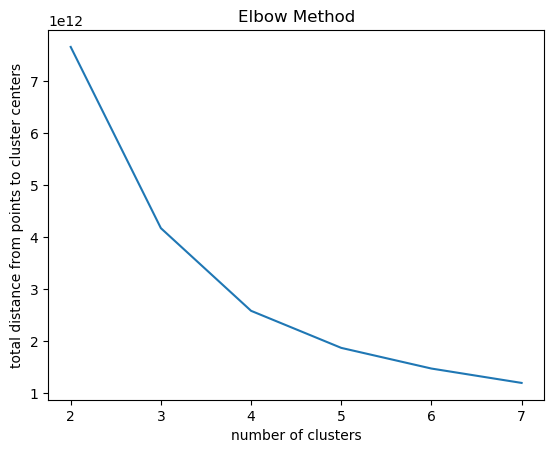

In [15]:
plt.plot(n_clusters, total_distance)
plt.xlabel('number of clusters')
plt.ylabel('total distance from points to cluster centers')
plt.title('Elbow Method')

In [20]:
cluster_labels

array([4, 4, 3, ..., 5, 5, 4])

In [19]:
sample_silhouette_values

array([0.46903923, 0.41700201, 0.48379593, ..., 0.70776098, 0.53396803,
       0.51448525])

For n_clusters = 2 The average silhouette_score is : 0.6605319572671935
For i =  0 the average silhouette score is : 0.45582530091901935
For i =  1 the average silhouette score is : 0.7175985187555591
For n_clusters = 3 The average silhouette_score is : 0.5941995617400118
For i =  0 the average silhouette score is : 0.4673695488375939
For i =  1 the average silhouette score is : 0.6823462522024191
For i =  2 the average silhouette score is : 0.39000441860721935
For n_clusters = 4 The average silhouette_score is : 0.5632725716902744
For i =  0 the average silhouette score is : 0.446831793498297
For i =  1 the average silhouette score is : 0.6605635480147412
For i =  2 the average silhouette score is : 0.3986944332519785
For i =  3 the average silhouette score is : 0.477829888932114
For n_clusters = 5 The average silhouette_score is : 0.5320140418809223
For i =  0 the average silhouette score is : 0.429107711055167
For i =  1 the average silhouette score is : 0.6441185754997802
For i =  

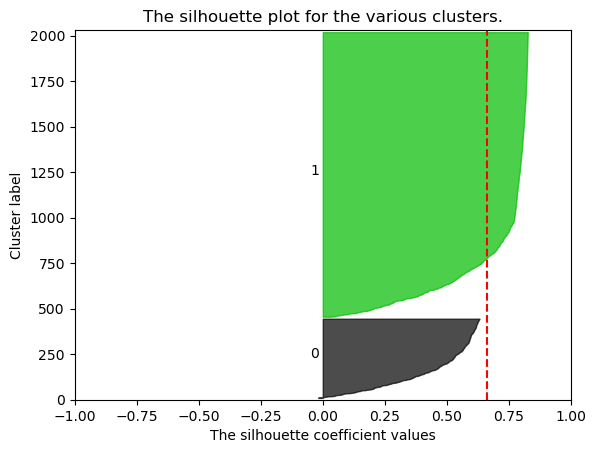

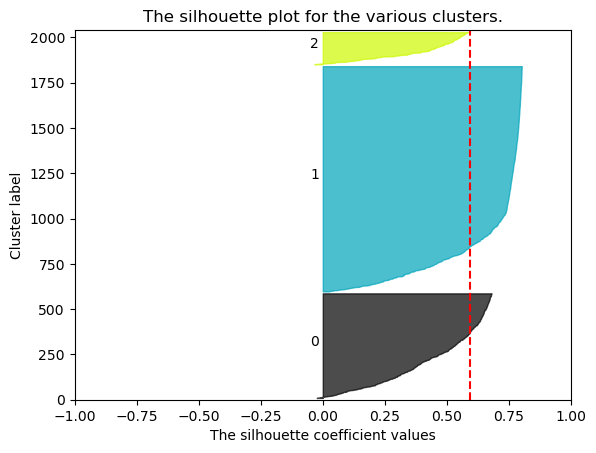

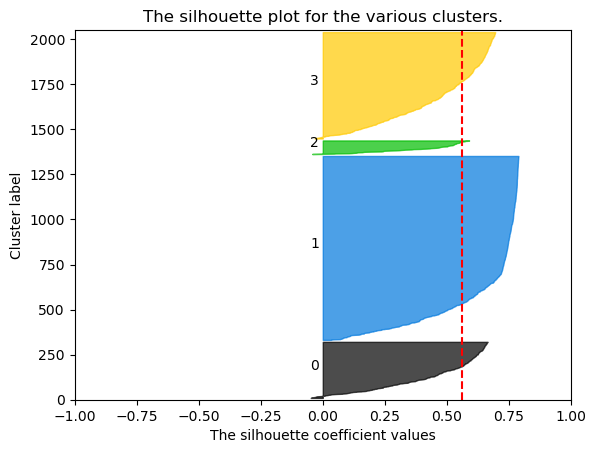

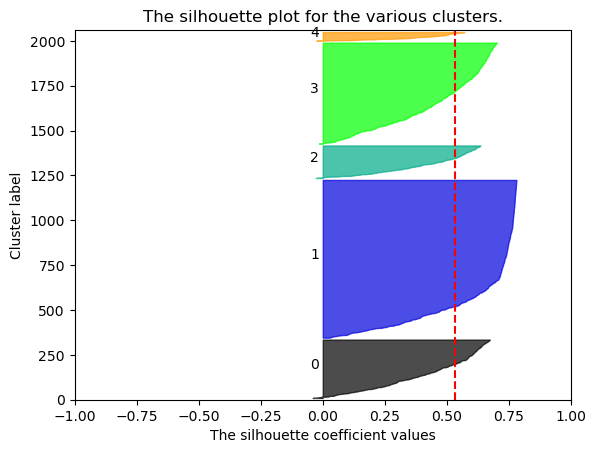

In [51]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
my_df = df.drop(columns=['Tech Support', 'Discount', 'Revenue'])
range_n_clusters = np.arange(2, 6)

for n_clusters in range_n_clusters:
    fig, ax= plt.subplots()

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(my_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(my_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(my_df, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(my_df, cluster_labels)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        print(
            'For i = ',
            i,
            'the average silhouette score is :',
            np.mean(ith_cluster_silhouette_values),
        )
        
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax.set_yticks([])  # Clear the yaxis labels / ticks
    # ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

plt.show()

In [52]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit_transform(my_df)

array([[ 92199.90544701, 115443.88633279, 288840.57469956,
         30541.44816565],
       [ 93184.0670904 , 117298.25796826, 288668.82757666,
         35304.31708539],
       [ 30366.0694212 , 233975.88177333, 171218.0223976 ,
        148696.25887582],
       ...,
       [238058.00911176,  30927.27932563, 434864.00195111,
        116504.27450087],
       [209214.07905777,   2159.23716565, 406020.00603779,
         87657.58174742],
       [ 98470.51021324, 111228.99155095, 294324.80383419,
         29196.4182212 ]])

In [53]:
kmeans4.cluster_centers_

array([[2.01277955e-01, 2.14057508e-01, 4.66453674e-01, 6.77316294e-01,
        6.10842077e+04, 6.48019169e+01, 6.14408946e+01, 2.43084613e+05],
       [2.03339882e-01, 1.78781925e-01, 5.24557957e-01, 6.96463654e-01,
        1.05426827e+04, 6.13752456e+01, 5.76178782e+01, 4.21927898e+04],
       [2.63157895e-01, 1.57894737e-01, 4.73684211e-01, 6.44736842e-01,
        1.08250382e+05, 6.50131579e+01, 6.42631579e+01, 4.34155184e+05],
       [1.92242833e-01, 2.17537943e-01, 4.94097808e-01, 6.94772344e-01,
        3.11409258e+04, 5.82225970e+01, 5.38296796e+01, 1.25269312e+05]])

In [54]:
df.head(3)

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.36300
1,0,0,1,1,20842,107,70,159038,0,1,14981.43559
2,0,0,0,1,82171,10,7,264935,1,1,32917.13894


In [60]:
print(sum(kmeans4.labels_==0), '\n',df[kmeans4.labels_ == 0].mean(axis=0))

312 
 Global Flag             0.201923
Major Flag              0.211538
SMC Flag                0.467949
Commercial Flag         0.679487
IT Spend            61170.612179
Employee Count         64.788462
PC Count               61.442308
Size               243263.695513
Tech Support            0.730769
Discount                0.692308
Revenue             27919.339789
dtype: float64


In [61]:
print(sum(kmeans4.labels_==1), '\n',df[kmeans4.labels_ == 1].mean(axis=0))

1020 
 Global Flag            0.202941
Major Flag             0.178431
SMC Flag               0.524510
Commercial Flag        0.696078
IT Spend           10544.157843
Employee Count        61.435294
PC Count              57.679412
Size               42278.703922
Tech Support           0.386275
Discount               0.433333
Revenue             9081.332455
dtype: float64


In [62]:
print(sum(kmeans4.labels_==2), '\n',df[kmeans4.labels_ == 2].mean(axis=0))

76 
 Global Flag             0.263158
Major Flag              0.157895
SMC Flag                0.473684
Commercial Flag         0.644737
IT Spend           108250.381579
Employee Count         65.013158
PC Count               64.263158
Size               434155.184211
Tech Support            0.881579
Discount                0.802632
Revenue             47612.937444
dtype: float64


In [58]:
print(sum(kmeans4.labels_==3), '\n',df[kmeans4.labels_ == 3].mean(axis=0))

592 
 Global Flag             0.192568
Major Flag              0.219595
SMC Flag                0.493243
Commercial Flag         0.694257
IT Spend            31213.015203
Employee Count         58.126689
PC Count               53.722973
Size               125506.579392
Tech Support            0.535473
Discount                0.510135
Revenue             15546.382567
dtype: float64
